In [1]:
#Importing the necessary modules
from wise_light_curves.wise_light_curves import *
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from matplotlib.patches import ConnectionPatch
import matplotlib.ticker as tick
from astropy.io import ascii
import numpy as np
import pandas as pd
import os
import scipy
from Potato import plotparams
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import constants as const
from IPython.display import display, Math


In [2]:
#This is where the asassnid goes
id_val = 94489418658																																																																																									

ra_val = 13.22923194	   			

dec_val = 63.58755732																														

In [3]:
#Defining the read_lightcurve_dat function. This function reads data files and imports them
def read_lightcurve_dat(asas_sn_id, guide = 'known_dipper_lightcurves/'):
    """
    Input: 
        asas_sn_id: the asassn id of the desired star
        guide: the path to the data file of the desired star

    Output: 
        dfv: This is the dataframe for the V-band data of the star
        dfg: This is the dataframe for the g-band data of the star
    
    This function reads the data of the desired star by going to the corresponding file and copying the data of that file onto 
    a data frame. This data frame is then sorted into two data frames by comparing the value in the Photo filter column. If the
    Photo filter column data has a value of one, its row is sorted into the data frame corresponding to the V-band. If the Photo
    filter column data has a value of zero, it gets sorted into the data frame corresponding to the g-band.
    """
    fname = os.path.join(guide, str(asas_sn_id)+'.dat')

    dfv = pd.DataFrame()
    dfg = pd.DataFrame()

    fdata = pd.read_fwf(fname, header=None)
    fdata.columns = ["JD", "Mag", "Mag_err", "Quality", "Cam_number", "Phot_filter", "Camera"] #These are the columns of data

    dfv = fdata.loc[fdata["Phot_filter"] == 1].reset_index(drop=True) #This sorts the data into the V-band
    dfg = fdata.loc[fdata["Phot_filter"] == 0].reset_index(drop=True) #This sorts the data into the g-band

    return dfv, dfg
#End of read_lightcurve_dat function

In [4]:
def read_lightcurve_csv(asas_sn_id, guide = 'known_dipper_lightcurves/'):
    """
    Input: 
        asas_sn_id: the asassn id of the desired star
        guide: the path to the data file of the desired star

    Output: 
        dfv: This is the dataframe for the V-band data of the star
        dfg: This is the dataframe for the g-band data of the star
    
    This function reads the data of the desired star by going to the corresponding file and copying the data of that file onto 
    a data frame. This data frame is then sorted into two data frames by comparing the value in the Photo filter column. If the
    Photo filter column data has a value of one, its row is sorted into the data frame corresponding to the V-band. If the Photo
    filter column data has a value of zero, it gets sorted into the data frame corresponding to the g-band.
    """
    fname = os.path.join(guide, str(asas_sn_id)+'.csv')

    df = pd.read_csv(fname)

    df['Mag'] = pd.to_numeric(df['mag'],errors='coerce')
    df = df.dropna()
    df['Mag'].astype(float)
    df['JD'] = df.HJD.astype(float)

    dfg = df.loc[df['Filter'] == 'g'].reset_index(drop=True)
    dfv = df.loc[df['Filter'] == 'V'].reset_index(drop=True)

    return dfv, dfg

In [5]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [6]:
dfv, dfg = read_lightcurve_csv(id_val, 'Updated_LC_data/')
dfv = dfv.loc[dfv.Mag < 15].reset_index(drop=True)
dfg = dfg.loc[dfg.Mag < 15].reset_index(drop=True)

In [7]:
def custom_id(ra,dec):
    c = SkyCoord(ra=ra_val*u.degree, dec=dec_val*u.degree, frame='icrs')
    ra_num = c.ra.hms
    dec_num = c.dec.dms

    if int(dec_num[0]) < 0:
        cust_id = 'J'+str(int(c.ra.hms[0])).rjust(2,'0')+str(int(c.ra.hms[1])).rjust(2,'0')+str(int(round(c.ra.hms[2]))).rjust(2,'0')+'$-$'+str(int(c.dec.dms[0])*(-1)).rjust(2,'0')+str(int(c.dec.dms[1])*(-1)).rjust(2,'0')+str(int(round(c.dec.dms[2])*(-1))).rjust(2,'0')
    else:
        cust_id = 'J'+str(int(c.ra.hms[0])).rjust(2,'0')+str(int(c.ra.hms[1])).rjust(2,'0')+str(int(round(c.ra.hms[2]))).rjust(2,'0')+'$+$'+str(int(c.dec.dms[0])).rjust(2,'0')+str(int(c.dec.dms[1])).rjust(2,'0')+str(int(round(c.dec.dms[2]))).rjust(2,'0')

    return cust_id

In [8]:
c = SkyCoord(ra=ra_val*u.degree, dec=dec_val*u.degree, frame='icrs')
print('RA:',c.ra.hms)
print('DEC:',c.dec.dms)

cust_id = custom_id(ra_val,dec_val)
label = r'\text{ID: }'
display(Math(f"${label}{cust_id}$"))

RA: hms_tuple(h=0.0, m=52.0, s=55.01566560000086)
DEC: dms_tuple(d=63.0, m=35.0, s=15.206352000006973)


<IPython.core.display.Math object>

In [9]:
print('Mean dfg mag:',np.mean(dfg.Mag))
print('Mean dfv mag:',np.mean(dfv.Mag))

Mean dfg mag: 13.659135099913119
Mean dfv mag: 12.904702681388013


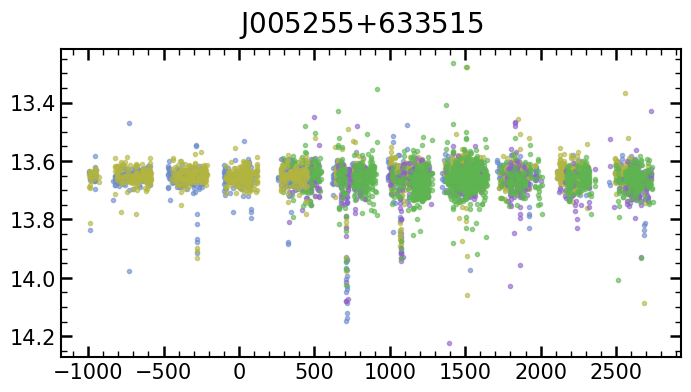

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
fig.suptitle(cust_id, fontsize=20)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["Mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    camjd2 = camdf2["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag2 = camdf2["Mag"].astype(float) + 0.75
    ax.scatter(camjd2, cammag2, color=colors[i], alpha=0.6, marker='.')

ax.invert_yaxis()

In [11]:
download_single_data(name='wise_'+str(id_val), ra=ra_val, dec=dec_val, root_path='WISE_Data/', radius=2.)

allwise = ascii.read('WISE_Data/wise_'+str(id_val)+'_allwise.ipac', format='ipac')
neowise = ascii.read('WISE_Data/wise_'+str(id_val)+'_neowise.ipac', format='ipac')
allwise, neowise = only_good_data_v1(allwise, neowise)

# MJD = JD - 2400000.5.
allwise['jd'] = allwise['mjd'] + 2400000.5
neowise['jd'] = neowise['mjd'] + 2400000.5

alldf = pd.DataFrame(np.array(allwise))
neodf = pd.DataFrame(np.array(neowise))

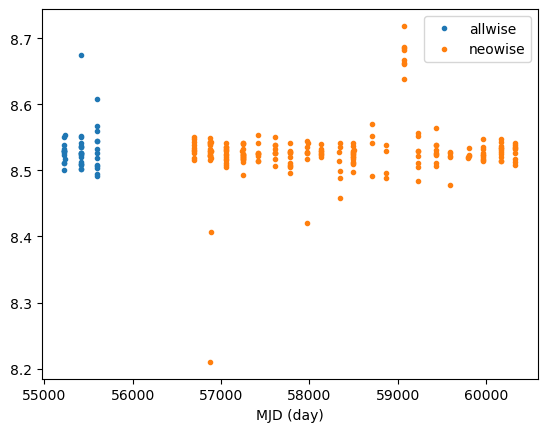

In [12]:
plot_full_lightcurve(allwise,neowise)

In [13]:
alldf = alldf.sort_values(by='jd',ignore_index=True)
alldf['bins'] = pd.cut(alldf['jd'],3)
allbins = alldf['bins'].unique()

allw1 = []
allw2 = []
allday = []

for i in range(len(allbins)):
    allbin = alldf.loc[alldf['bins'] == allbins[i]].reset_index(drop=True)
    allw1.append(allbin['w1mpro_ep'].median())
    allw2.append(allbin['w2mpro_ep'].median())
    allday.append(allbin['jd'].median())

print(len(allday))

3


In [14]:
neodf = neodf.sort_values(by='jd',ignore_index=True)
neodf['bins'] = pd.cut(neodf['jd'],23)
neobins = neodf['bins'].unique()

neow1 = []
neow2 = []
neoday = []

for i in range(len(neobins)):
    neobin = neodf.loc[neodf['bins'] == neobins[i]].reset_index(drop=True)
    neow1.append(neobin['w1mpro'].median())
    neow2.append(neobin['w2mpro'].median())
    neoday.append(neobin['jd'].median())

print(len(neow1))

21


In [15]:
wise_day = allday + neoday

wise_w1 = allw1 + neow1

wise_w2 = allw2 + neow2

wise_color = [j-i for i,j in zip(wise_w2,wise_w1)]

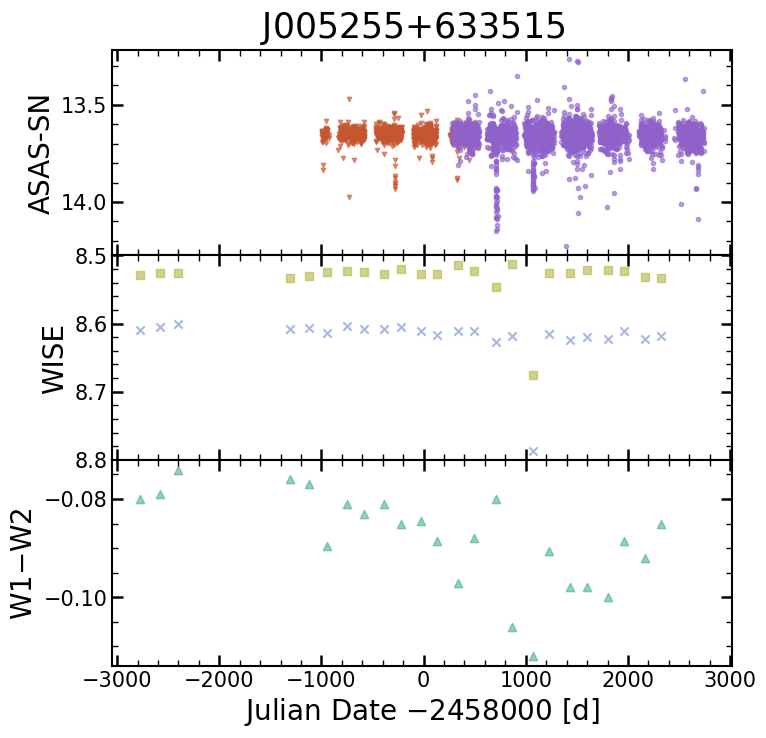

In [16]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 8))
fig.subplots_adjust(hspace=0)
fig.suptitle(cust_id, fontsize=25, y=0.93)
ax[0] = plotparams(ax[0])

wise_day_plot = [i - (2.458 * 10 **6) for i in wise_day]

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

ax[0].scatter((dfv['JD'] - (2.458 * 10 **6)), dfv['Mag']+ 0.75, color = colors[6], label = 'ASAS-SN V-band', alpha = 0.6, marker = 'v', s=10)
ax[0].scatter((dfg['JD'] - (2.458 * 10 **6)), dfg['Mag'], color = colors[2], label='ASAS-SN g-band', alpha = 0.6, marker = '.')

ax[0].invert_yaxis() 
ax[0].set_ylabel('ASAS-SN', fontsize=20)

ax[1] = plotparams(ax[1])

ax[1].scatter(wise_day_plot, wise_w1, color=colors[1], label='W1', alpha=0.6,  marker = 's')
ax[1].scatter(wise_day_plot, wise_w2, color=colors[0], label='W2', alpha=0.6,  marker = 'x')

ax[1].invert_yaxis()
ax[1].set_ylabel('WISE', fontsize=20)

ax[2] = plotparams(ax[2])

ax[2].scatter(wise_day_plot, wise_color, color=colors[5], label='W1$-$W2', alpha=0.6,  marker = '^')

ax[2].set_ylabel('W1$-$W2', fontsize=20)

ax[2].set_xlabel('Julian Date $- 2458000$ [d]', fontsize=20)

handles1, labels1 = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
handles3, labels3 = ax[2].get_legend_handles_labels()
handles = handles1 + handles2 + handles3
labels = labels1 + labels2 + labels3
#fig.legend(handles, labels, loc='upper left', edgecolor='black', fontsize=15, bbox_to_anchor=(0.12,0.88))
plt.show()

In [17]:
neo_dip = neodf.loc[neodf['w1mpro']>8.6].reset_index(drop=True)

neo_min = Time(min(neo_dip['jd']), format='jd')
neo_min.format = 'iso'
print('The first day is:', neo_min)

neo_max = Time(max(neo_dip['jd']), format='jd')
neo_max.format = 'iso'
print('The last day is:', neo_max)

neo_med = Time(neo_dip['jd'].median(), format='jd')
neo_med.format = 'iso'
print('The median day is:', neo_med)

The first day is: 2020-08-06 12:26:03.021
The last day is: 2020-08-08 00:31:47.335
The median day is: 2020-08-07 01:46:26.637
